# Export Intensity Images from FLIM data acquired in PIE mode

In [1]:
# Import all required libraries
import tttrlib
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski

## Load the data

In [2]:
# First, read the TTTR data.
# and define used channels
filename_data = './FLIM/mGBP_DA.ht3'
tttr_data = tttrlib.TTTR(filename_data, 'HT3')

tttr_data.used_routing_channels  # Return list of used detection channel

array([4, 5, 0, 1, 2], dtype=int8)

In [3]:
# Actually used Detector pairs (Seidel pairs)
green_ch = [0, 1]
red_ch = [5, 4]

## Pulsed Interleaved Excitation: Define prompt & delay time windows

In [4]:
# Split the data into prompt and delay.
tttr_green = tttr_data.get_tttr_by_channel(green_ch)
tttr_red = tttr_data.get_tttr_by_channel(red_ch)
prompt_range = 0, 11000  # These numbers results from the used repetition rate and microtime binning
delay_range = 11000, 25000  # and need to be known/specified by the user

## Create CLSM image container

In [18]:
# Fills the CLSM image container with photons
# Intensity image => number of photon counts in a pixel

# In the green channel we use all photons
clsm_green = tttrlib.CLSMImage(tttr_data=tttr_data, channels=green_ch)
# In the red channels we plit by time window
clsm_red_prompt = tttrlib.CLSMImage(tttr_data=tttr_data, channels=red_ch, micro_time_ranges=[prompt_range])
clsm_red_delay = tttrlib.CLSMImage(tttr_data=tttr_data, channels=red_ch, micro_time_ranges=[delay_range])

## Intensity Images

In [6]:
# The intensity images are a time-series (multiple frames). We sum over all frames to improve the counting statistics
# Note: image shape is in the order of t-y-x, thus summation of over axis=0 results in generating the t-projection

int_green = clsm_green.intensity # green channels
SUM_green = clsm_green.intensity.sum(axis=0)

int_red_prompt = clsm_red_prompt.intensity # red channels, prompt time window
SUM_red_prompt = clsm_red_prompt.intensity.sum(axis=0)

int_red_delay = clsm_red_delay.intensity # red channels, delay time window
SUM_red_delay = clsm_red_delay.intensity.sum(axis=0)

# sum over all channels and time windows (These data was later used to perform the image segmentation)
SUM_int = int_green + int_red_prompt + int_red_delay
SUM_sum = SUM_green + SUM_red_prompt + SUM_red_delay

# Save intensity images as tif & frame series
ski.io.imsave(filename_data + '_green.tif', ski.img_as_uint(int_green), check_contrast=False)
ski.io.imsave(filename_data + '_red_prompt.tif', ski.img_as_uint(int_red_prompt), check_contrast=False)
ski.io.imsave(filename_data + '_red_delay.tif', ski.img_as_uint(int_red_delay), check_contrast=False)
ski.io.imsave(filename_data + '_sum.tif', ski.img_as_uint(SUM_int), check_contrast=False)

In [7]:
# save the sum over all frames (t-projection)
ski.io.imsave(filename_data + '_green_SUM.tif', ski.img_as_uint(SUM_green), check_contrast=False)
ski.io.imsave(filename_data + '_red_prompt_SUM.tif', ski.img_as_uint(SUM_red_prompt), check_contrast=False)
ski.io.imsave(filename_data + '_red_delay_SUM.tif', ski.img_as_uint(SUM_red_delay), check_contrast=False)
ski.io.imsave(filename_data + '_sum_SUM.tif', ski.img_as_uint(SUM_sum), check_contrast=False)

/opt/tljh/user/lib/python3.9/site-packages/skimage/util/dtype.py:501: UserWarning: Downcasting uint64 to uint16 without scaling because max value 5869 fits in uint16
  return _convert(image, np.uint16, force_copy)
/opt/tljh/user/lib/python3.9/site-packages/skimage/util/dtype.py:501: UserWarning: Downcasting uint64 to uint16 without scaling because max value 543 fits in uint16
  return _convert(image, np.uint16, force_copy)
/opt/tljh/user/lib/python3.9/site-packages/skimage/util/dtype.py:501: UserWarning: Downcasting uint64 to uint16 without scaling because max value 11961 fits in uint16
  return _convert(image, np.uint16, force_copy)
/opt/tljh/user/lib/python3.9/site-packages/skimage/util/dtype.py:501: UserWarning: Downcasting uint64 to uint16 without scaling because max value 14602 fits in uint16
  return _convert(image, np.uint16, force_copy)


## Show the integrated intensity images

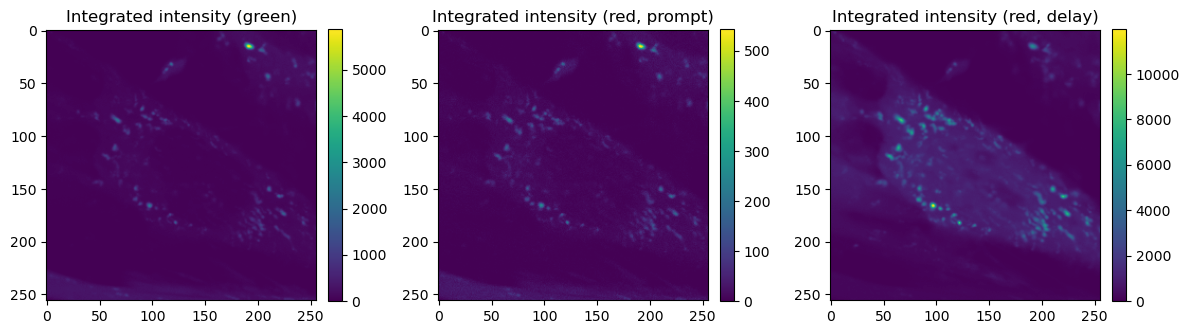

In [17]:
def plot_images(images, titles, cmaps=None, **kwargs):
    # Define convenience function for plotting
    if cmaps is None:
        cmaps = ['viridis'] * len(images)
    if titles is None:
        titles = [''] * len(images)
    fig, ax = plt.subplots(**kwargs)
    if not isinstance(ax, list):
        ax = np.array([ax])
    ax = ax.flatten()
    for i, img in enumerate(images):
        im = ax[i].imshow(img, cmap=cmaps[i])
        ax[i].set_title(titles[i])
        fig.colorbar(im, ax=ax[i], fraction=0.046, pad=0.04)
    return fig, ax

fig, _ = plot_images(
    [SUM_green, SUM_red_prompt, SUM_red_delay],
    ncols=3, nrows=1, figsize=(12,12),
    titles=[
        'Integrated intensity (green)',
        'Integrated intensity (red, prompt)',
        'Integrated intensity (red, delay)',
    ]
)
plt.tight_layout()
fig.show()
